In [ ]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 8.4 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
env = gym.make("FrozenLake-v1", render_mode='rgb_array')

In [ ]:
def render(rendered_images):
  num_images = len(rendered_images)
  fig, ax = plt.subplots(1, num_images, figsize=(num_images * 5, 5))
  if num_images == 1:
    ax = [ax]
  for i, image_array in enumerate(rendered_images):
    ax[i].imshow(image_array)
    ax[i].axis('off')

  plt.show()

In [ ]:
num_actions = env.action_space.n
num_states = env.observation_space.n

In [ ]:
num_episodes = 10000
max_steps = 100
learning_rate = 0.1
discount_factor = 0.96
exploration_rate = 1
min_exploration_rate = 0.01
max_exploration_rate = 1
exploration_decay_rate = 0.001

In [ ]:
Q = np.zeros([num_states, num_actions])

for episode in range(num_episodes):
  done = False
  steps = 0
  state = env.reset()[0]
  epsilon = random.uniform(0, 1)

  while not done and steps < max_steps:
    action=0

    if np.random.uniform(0, 1) < exploration_rate:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])

    next_state, reward, done, _, _  = env.step(action)
    predicted_value = Q[state, action]
    target_value = reward + (discount_factor * np.max(Q[next_state, :]))
    Q[state, action] += learning_rate * (target_value - predicted_value)

    state = next_state
    steps += 1

  exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(- exploration_decay_rate * episode)

In [ ]:
Q

array([[0.2744666 , 0.21828278, 0.21451655, 0.21270825],
       [0.1295037 , 0.13123016, 0.09266523, 0.20586856],
       [0.18116412, 0.12396202, 0.12305032, 0.12408747],
       [0.07399643, 0.08521283, 0.08132714, 0.11511084],
       [0.30776674, 0.14153258, 0.15507665, 0.14103623],
       [0.        , 0.        , 0.        , 0.        ],
       [0.07108727, 0.07752733, 0.20450401, 0.01960464],
       [0.        , 0.        , 0.        , 0.        ],
       [0.18758112, 0.17937001, 0.24019721, 0.38398901],
       [0.3328762 , 0.47959139, 0.26012486, 0.21653278],
       [0.54759502, 0.304562  , 0.19607993, 0.21131081],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.2865844 , 0.33812745, 0.60629456, 0.25077198],
       [0.58067978, 0.77325363, 0.59736022, 0.60970238],
       [0.        , 0.        , 0.        , 0.        ]])

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
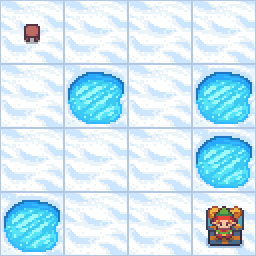

In [ ]:
env.render()

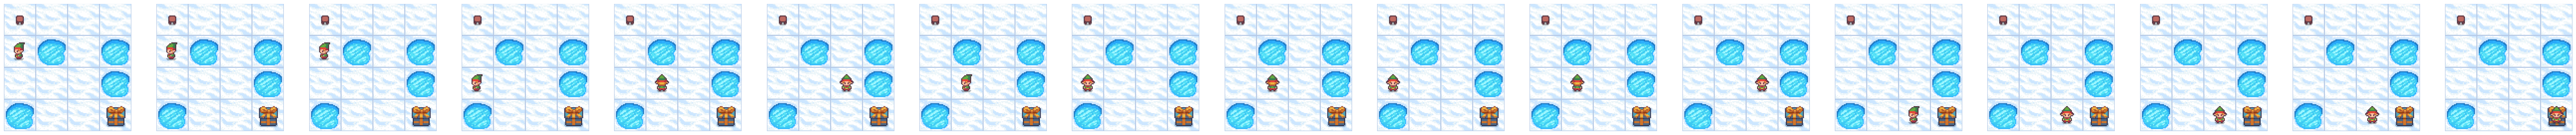

In [ ]:
rendered_images = []
done = False
state = env.reset()[0]
steps = 0
while not done and steps < 20:
    action = np.argmax(Q[state, :])
    next_state, reward, done, _, _ = env.step(action)
    state = next_state
    steps += 1
    image_array = env.render()
    rendered_images.append(image_array)
render(rendered_images)

In [ ]:
type(Q[0][0])

numpy.float64

In [ ]:
env.close()